## N（T）

### First, clarify the ideas:
#### 1. Obtain the DOS file and extract the horizontal and vertical axis data.
#### 2. Obtain the Boltzmann constant, the Fermi level parameter of the DOS file is used as a constant for subsequent input.
#### 3. Use the differential element method to calculate the integral, divide the area of the image into small trapezoids, dE is the height of the trapezoid, and add up all the small trapezoidal surfaces to get the total integral.
#### 4. Calculate the corresponding N(T) value according to the given temperature.
#### 5. Input multiple T values, get multiple N values, and draw the image based on these data.

In [7]:
import math

filename = 'TDOS.dat'
Ef = 0.0
Kb = 1.380649*1e-23
ee = 1.6021766208*1e-19


def getdos(filen,T):
    '''
    该函数用于求解N（T）问题
    filen为TDOS文件
    T为温度
    输出为对应温度下的N
    '''
    a = open(filen,'r')
    aa = a.readlines()
    dosall = []
    for i in range(1,len(aa)):
        dos = (aa[i]).split()
        dosall.append([float(dos[0]),float(dos[1])])
    
    def getfE(E,DOSE):
        '''
        该函数用于求解DOSf（E）
        E为对应的能量
        输出为f（E）的值
        '''
        try:
            res1 = DOSE/(pow(math.e,(1/(Kb*T))*(E-Ef)*ee)+1) 
        except:
            res1 = 0

        return res1
    
    res = 0
    for j in range(0,len(dosall)-1):
        h = dosall[j+1][0]-dosall[j][0]
        y = (getfE(dosall[j][0],dosall[j][1])+getfE(dosall[j][0],dosall[j][1]))/2
        res += h*y
    
    return res

### Generate a set of temperature plots

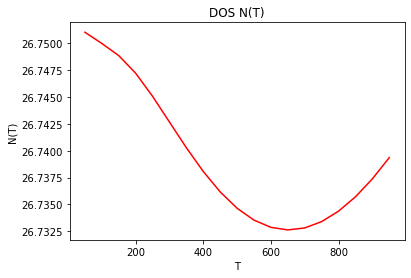

In [8]:
import matplotlib 
from matplotlib import pyplot as plt

Ts = range(50,1000,50)
Ns = []
for i in range(len(Ts)):
    Ns.append(getdos(filename,Ts[i]))


plt.plot(Ts,Ns,color='r')
plt.xlabel('T')
plt.ylabel('N(T)')
plt.title('DOS N(T)')
plt.show()


### For the above code, it is important to note:
#### In fact, the solved N(T) is not the actual N(T) calculated according to the formula, because once T exceeds a certain range, the program will report an error value overflow, so a try-expect judgment was made.
#### At the same time, the above error also confirms the hypothesis of this procedure: assuming that the Fermi level EF does not change with temperature, in fact the Fermi level changes with temperature. And N does not change with temperature, so finding N when T=0 also finds N in all cases.
#### In the numerical calculation of the program, this is also confirmed. When the assumption of the sub-program is followed, that is, EF remains unchanged. Except for T=0, N can be calculated. In other cases, the value will overflow, that is, it cannot be calculated, so in fact This assumption cannot be established.